In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("./hcap.sqlite")

cases = pd.read_sql_query("SELECT * FROM cases", conn)
attscases = pd.read_sql_query("SELECT * FROM attorney_cases", conn)

In [20]:
##
## Page count of cases of an attorney?
##
## We will use the Attorney ID from question no. 2
attorney_id = 34124
pd.read_sql_query("SELECT * FROM attorneys WHERE id = ?", conn, params=(attorney_id,))

,id,names
0,34124,william j. tuohy


In [34]:
attcases = attscases[attscases["attorney_id"] == attorney_id]
print(attcases.head(3).to_latex())
attcases.head(3)

\begin{tabular}{lrrlll}
\toprule
{} &  attorney\_id &  case\_id &        party &  party\_type &                          title \\
\midrule
22142 &        34124 &  2509203 &  the people. &  government &                states attorney \\
22169 &        34124 &  2505496 &    appellee. &     private &  state’s attorney on rehearing \\
22298 &        34124 &  2460093 &   appellees. &  government &                states attorney \\
\bottomrule
\end{tabular}



,attorney_id,case_id,party,party_type,title
22142,34124,2509203,the people.,government,states attorney
22169,34124,2505496,appellee.,private,state’s attorney on rehearing
22298,34124,2460093,appellees.,government,states attorney


In [39]:
##
## Merge the case information into the cases for the attorney, 
##
attcaselst = pd.merge(attcases, cases, how="left", left_on="case_id", right_on="id")
attcaselst["page_count"] = attcaselst.last_page - attcaselst.first_page 
casespgcnt = attcaselst[["case_id", "decision_date", "page_count"]]
casespgcnt.head()

,case_id,decision_date,page_count
0,2509203,1945-05-23,12
1,2505496,1945-01-17,20
2,2460093,1947-11-20,9
3,2617944,1948-11-18,10
4,2615531,1949-01-19,5


In [40]:
series = pd.Series(casespgcnt["page_count"].values, 
                   index=pd.DatetimeIndex(casespgcnt["decision_date"]))
series = series[series > 0]
print(series.head().to_latex())

\begin{tabular}{lr}
\toprule
{} &   0 \\
decision\_date &     \\
\midrule
1945-05-23    &  12 \\
1945-01-17    &  20 \\
1947-11-20    &   9 \\
1948-11-18    &  10 \\
1949-01-19    &   5 \\
\bottomrule
\end{tabular}



In [38]:
##
## Some basic stats
bstats = series.agg(['max', "min", "mean", "sum"])

print(bstats.to_latex())
bstats

\begin{tabular}{lr}
\toprule
{} &            0 \\
\midrule
max  &    22.000000 \\
min  &     1.000000 \\
mean &     6.302083 \\
sum  &  1210.000000 \\
\bottomrule
\end{tabular}



max       22.000000
min        1.000000
mean       6.302083
sum     1210.000000
dtype: float64

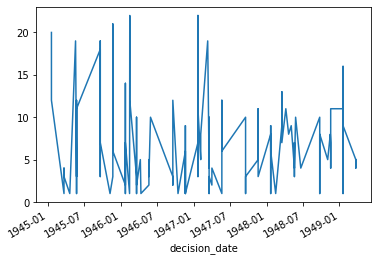

In [41]:
series.plot.line(x='Page Count', y='Decision Date')